# Question1 
Re-analyse the annual maximum gust wind speeds for (I) the years 1952 to 1998, (II) the years 1952 to 1997, i.e. ignore the high value recorded in 1998. Compare the resulting predictions of design wind speeds for (a) 50 years return period, and (b) 1000 years return period, and comment.
# Question2 
Using the parameter estimation approach in code GB 50009 2012, predict the 10, 20, 50, 100, 200, 500, 1000 years return period design wind speeds for the above two cases, and compare the results with the Gumbel approach.


In [1]:

# 导入必要的库，pandas用于数据处理
import pandas as pd
from io import StringIO # python3中StringIO的位置

# 加载数据
data = """
year,Wind speed m/s
1952,31.4
1953,33.4
1954,29.8
1955,30.3
1956,27.8
1957,30.3
1958,29.3
1959,36.5
1960,29.3
1961,27.3
1962,31.9
1963,28.8
1964,25.2
1965,27.3
1966,23.7
1967,27.8
1968,32.4
1969,27.8
1970,26.2
1971,30.9
1972,31.9
1973,27.3
1974,25.7
1975,32.9
1976,28.3
1977,27.3
1978,28.3
1979,28.3
1980,29.3
1981,27.8
1982,27.8
1983,30.9
1984,26.7
1985,30.3
1986,28.3
1987,30.3
1988,34
1989,28.8
1990,30.3
1991,27.3
1992,27.8
1993,28.8
1994,30.9
1995,26.2
1996,25.7
1997,24.7
1998,42.2
"""

# 将data数据转换为StringIO对象，再读取为DataFrame
df = pd.read_csv(StringIO(data)) 


# Answer1


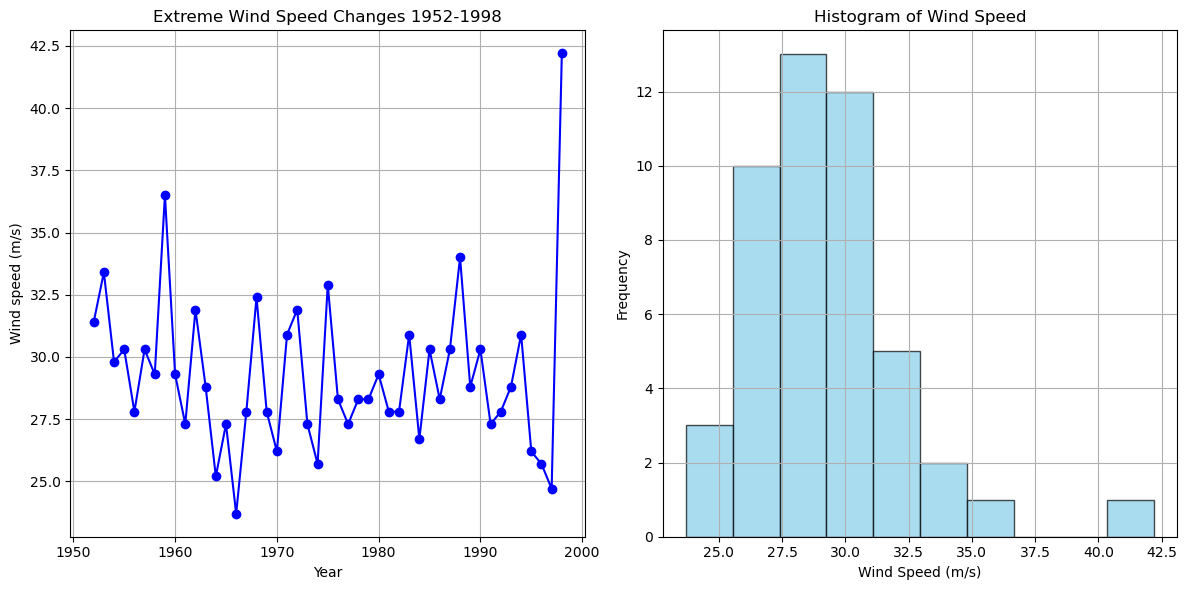

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gumbel_r

# Data preparation and visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df['year'], df['Wind speed m/s'], 'o-', color='blue')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Wind speed (m/s)')
plt.title('Extreme Wind Speed Changes 1952-1998')

# Sort data to check distribution
plt.subplot(1, 2, 2)
plt.hist(df['Wind speed m/s'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.grid(True)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')
plt.tight_layout()


Gumbel Fitting Results (1952-1998):
Location parameter u = 27.7246
Scale parameter α = 2.8165
Correlation coefficient R² = 0.9441


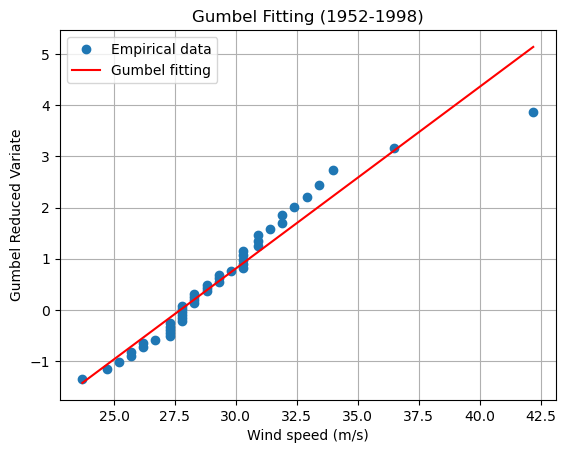

In [3]:

# Gumbel distribution fitting - All data (1952-1998)
wind_speed_all = df['Wind speed m/s'].values
n_all = len(wind_speed_all)

# Calculate empirical cumulative probability
# Using Gumbel plotting position: P = m/(n+1)
wind_speed_all_sorted = np.sort(wind_speed_all)
p_all = np.arange(1, n_all + 1) / (n_all + 1)
y_all = -np.log(-np.log(p_all))  # Gumbel reduced variate

# Linear fitting y = ax + b, where x = wind speed, y = Gumbel reduced variate
slope_all, intercept_all, r_value_all, p_value_all, std_err_all = stats.linregress(wind_speed_all_sorted, y_all)

# Gumbel distribution parameters
# Mode (location parameter) u = -b/a
# Scale parameter α = 1/a
u_all = -intercept_all / slope_all
alpha_all = 1 / slope_all

print("Gumbel Fitting Results (1952-1998):")
print(f"Location parameter u = {u_all:.4f}")
print(f"Scale parameter α = {alpha_all:.4f}")
print(f"Correlation coefficient R² = {r_value_all**2:.4f}")


# Plot data and fitted line
# plt.figure()
# plt.subplot(1, 2, 1)
plt.plot(wind_speed_all_sorted, y_all, 'o', label='Empirical data')
x_fit = np.linspace(min(wind_speed_all_sorted), max(wind_speed_all_sorted), 100)
y_fit = slope_all * x_fit + intercept_all
plt.plot(x_fit, y_fit, 'r-', label='Gumbel fitting')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Gumbel Reduced Variate')
plt.title('Gumbel Fitting (1952-1998)')
plt.grid(True)
plt.legend()
plt.show()


Gumbel Fitting Results (1952-1997):
Location parameter u = 27.7665
Scale parameter α = 2.2280
Correlation coefficient R² = 0.9840


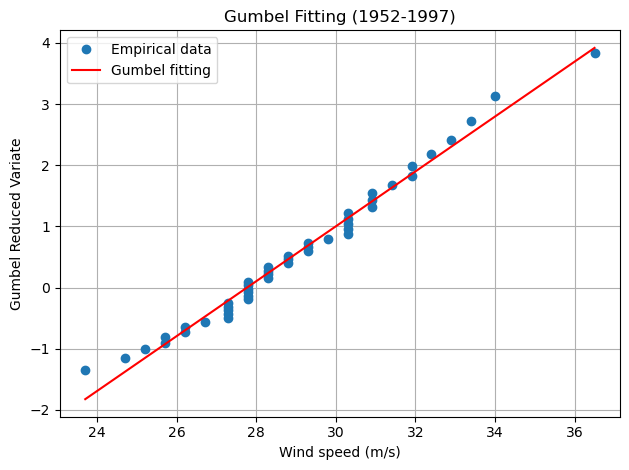

In [4]:

# Gumbel distribution fitting - Exclude 1998 data (1952-1997)
wind_speed_filtered = df[df['year'] != 1998]['Wind speed m/s'].values
n_filtered = len(wind_speed_filtered)

# Calculate empirical cumulative probability
wind_speed_filtered_sorted = np.sort(wind_speed_filtered)
p_filtered = np.arange(1, n_filtered + 1) / (n_filtered + 1)
y_filtered = -np.log(-np.log(p_filtered))

# Linear fitting
slope_filtered, intercept_filtered, r_value_filtered, p_value_filtered, std_err_filtered = stats.linregress(wind_speed_filtered_sorted, y_filtered)

# Gumbel distribution parameters
u_filtered = -intercept_filtered / slope_filtered
alpha_filtered = 1 / slope_filtered

print("\nGumbel Fitting Results (1952-1997):")
print(f"Location parameter u = {u_filtered:.4f}")
print(f"Scale parameter α = {alpha_filtered:.4f}")
print(f"Correlation coefficient R² = {r_value_filtered**2:.4f}")

# Plot data and fitted line
# plt.subplot(1, 2, 2)
plt.plot(wind_speed_filtered_sorted, y_filtered, 'o', label='Empirical data')
x_fit = np.linspace(min(wind_speed_filtered_sorted), max(wind_speed_filtered_sorted), 100)
y_fit = slope_filtered * x_fit + intercept_filtered
plt.plot(x_fit, y_fit, 'r-', label='Gumbel fitting')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Gumbel Reduced Variate')
plt.title('Gumbel Fitting (1952-1997)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:

# Calculate design wind speeds for different return periods
def get_design_wind_speed(u, alpha, return_period):
    y = -np.log(-np.log(1 - 1/return_period))
    return u + alpha * y

# Calculate design wind speeds
return_periods = [50, 1000]
print("\nDesign Wind Speed Comparison Results:")
print(f"{'Return Period(yr)':>12} | {'1952-1998 (m/s)':>15} | {'1952-1997 (m/s)':>15} | {'Difference (m/s)':>10}")
print("-" * 70)

for rp in return_periods:
    ws_all = get_design_wind_speed(u_all, alpha_all, rp)
    ws_filtered = get_design_wind_speed(u_filtered, alpha_filtered, rp)
    diff = ws_all - ws_filtered
    print(f"{rp:>12} | {ws_all:>15.2f} | {ws_filtered:>15.2f} | {diff:>+10.2f}")



Design Wind Speed Comparison Results:
Return Period(yr) | 1952-1998 (m/s) | 1952-1997 (m/s) | Difference (m/s)
----------------------------------------------------------------------
          50 |           38.71 |           36.46 |      +2.25
        1000 |           47.18 |           43.16 |      +4.02


# Answer2

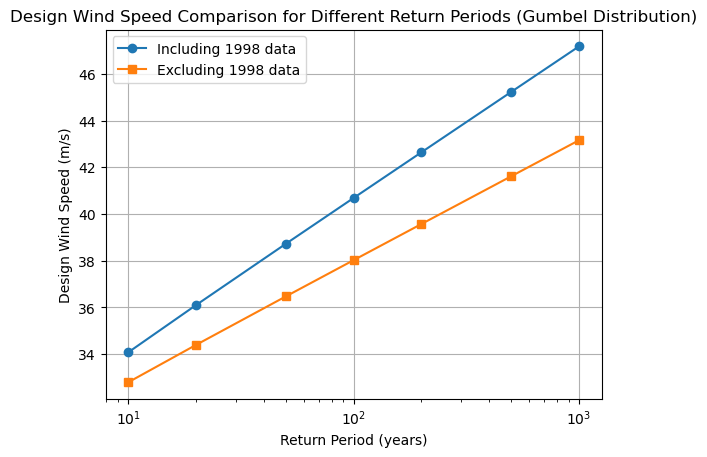

In [9]:
# Plot the relationship between return period and design wind speed
rp_values = np.array([10, 20, 50, 100, 200, 500, 1000])
ws_all_values = [get_design_wind_speed(u_all, alpha_all, rp) for rp in rp_values]
ws_filtered_values = [get_design_wind_speed(u_filtered, alpha_filtered, rp) for rp in rp_values]

# plt.figure(figsize=(10, 6))
plt.semilogx(rp_values, ws_all_values, 'o-', label='Including 1998 data')
plt.semilogx(rp_values, ws_filtered_values, 's-', label='Excluding 1998 data')
plt.xlabel('Return Period (years)')
plt.ylabel('Design Wind Speed (m/s)')
plt.title('Design Wind Speed Comparison for Different Return Periods (Gumbel Distribution)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# GB 50009 2012 parameter estimation method
import math

# Function to calculate design wind speed using GB 50009 2012 approach
def gb50009_design_wind_speed(wind_data, return_periods):
    """Calculate design wind speed according to GB 50009 2012"""
    n = len(wind_data)
    
    # Calculate sample mean
    v_mean = np.mean(wind_data)
    
    # Calculate sample standard deviation
    v_std = np.std(wind_data, ddof=1)
    
    # Calculate coefficient of variation
    cv = v_std / v_mean
    
    C_1 = 1.16066
    C_2 = 0.54853
    alpha = C_1 / v_std
    u = v_mean - C_2 / alpha

    # Calculate design wind speeds for different return periods
    results = {}
    for T in return_periods:
        # Calculate design wind speed
        # Formula: v_T = u - 1 / alpha * ln(ln(R / (R-1)))
        v_T = u - 1/alpha * np.log(np.log(T / (T - 1)))

        results[T] = v_T
    
    return results, v_mean, v_std, cv

# Define return periods for analysis
return_periods = [10, 20, 50, 100, 200, 500, 1000]

# Calculate design wind speeds for all data (1952-1998)
gb_results_all, v_mean_all, v_std_all, cv_all = gb50009_design_wind_speed(wind_speed_all, return_periods)

# Calculate design wind speeds excluding 1998 data (1952-1997)
gb_results_filtered, v_mean_filtered, v_std_filtered, cv_filtered = gb50009_design_wind_speed(wind_speed_filtered, return_periods)

# Display GB 50009 2012 parameter estimation results
print("\nGB 50009 2012 Parameter Estimation Results:")
print(f"{'Dataset':>12} | {'Mean (m/s)':>12} | {'Std Dev (m/s)':>12} | {'CV':>10}")
print("-" * 54)
print(f"{'1952-1998':>12} | {v_mean_all:>12.2f} | {v_std_all:>12.2f} | {cv_all:>10.4f}")
print(f"{'1952-1997':>12} | {v_mean_filtered:>12.2f} | {v_std_filtered:>12.2f} | {cv_filtered:>10.4f}")

# Compare design wind speeds using GB 50009 method with Gumbel method
print("\nGB 50009 2012 vs Gumbel Method Design Wind Speed Comparison:")
print(f"{'Return Period(yr)':>12} | {'Dataset':>12} | {'GB 50009 (m/s)':>15} | {'Gumbel (m/s)':>15} | {'Difference (m/s)':>10}")
print("-" * 74)

for rp in return_periods:
    # Comparison with 1998 data included
    gb_ws_all = gb_results_all[rp]
    gumbel_ws_all = get_design_wind_speed(u_all, alpha_all, rp)
    diff_all = gb_ws_all - gumbel_ws_all
    
    # Comparison with 1998 data excluded
    gb_ws_filtered = gb_results_filtered[rp]
    gumbel_ws_filtered = get_design_wind_speed(u_filtered, alpha_filtered, rp)
    diff_filtered = gb_ws_filtered - gumbel_ws_filtered
    
    print(f"{rp:>12} | {'1952-1998':>12} | {gb_ws_all:>15.2f} | {gumbel_ws_all:>15.2f} | {diff_all:>+10.2f}")
    print(f"{' ':>12} | {'1952-1997':>12} | {gb_ws_filtered:>15.2f} | {gumbel_ws_filtered:>15.2f} | {diff_filtered:>+10.2f}")
    print("-" * 74)



GB 50009 2012 Parameter Estimation Results:
     Dataset |   Mean (m/s) | Std Dev (m/s) |         CV
------------------------------------------------------
   1952-1998 |        29.27 |         3.20 |     0.1092
   1952-1997 |        28.98 |         2.58 |     0.0889

GB 50009 2012 vs Gumbel Method Design Wind Speed Comparison:
Return Period(yr) |      Dataset |  GB 50009 (m/s) |    Gumbel (m/s) | Difference (m/s)
--------------------------------------------------------------------------
          10 |    1952-1998 |           33.95 |           34.06 |      -0.11
             |    1952-1997 |           32.76 |           32.78 |      -0.02
--------------------------------------------------------------------------
          20 |    1952-1998 |           35.94 |           36.09 |      -0.15
             |    1952-1997 |           34.36 |           34.38 |      -0.02
--------------------------------------------------------------------------
          50 |    1952-1998 |           38.50 | 

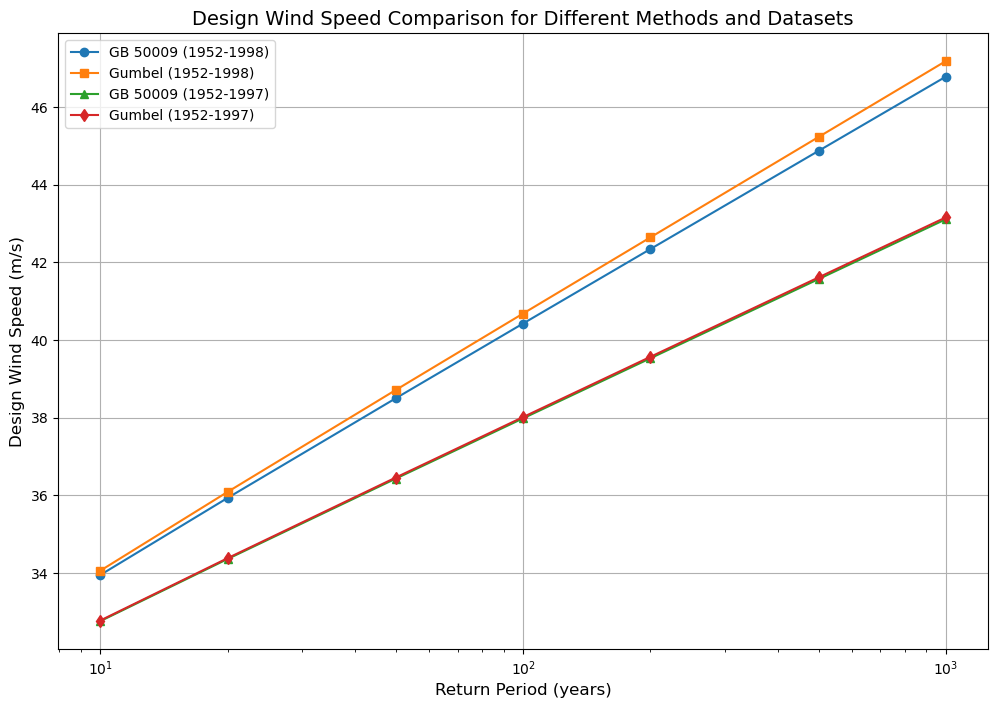

In [10]:
# Visualization of results
# Plot for 1952-1998 dataset
gb_values_all = [gb_results_all[rp] for rp in return_periods]
gumbel_values_all = [get_design_wind_speed(u_all, alpha_all, rp) for rp in return_periods]

# Plot for 1952-1997 dataset
gb_values_filtered = [gb_results_filtered[rp] for rp in return_periods]
gumbel_values_filtered = [get_design_wind_speed(u_filtered, alpha_filtered, rp) for rp in return_periods]

# Comprehensive comparison of all methods and datasets
plt.figure(figsize=(12, 8))
plt.semilogx(return_periods, gb_values_all, 'o-', label='GB 50009 (1952-1998)')
plt.semilogx(return_periods, gumbel_values_all, 's-', label='Gumbel (1952-1998)')
plt.semilogx(return_periods, gb_values_filtered, '^-', label='GB 50009 (1952-1997)')
plt.semilogx(return_periods, gumbel_values_filtered, 'd-', label='Gumbel (1952-1997)')
plt.xlabel('Return Period (years)', fontsize=12)
plt.ylabel('Design Wind Speed (m/s)', fontsize=12)
plt.title('Design Wind Speed Comparison for Different Methods and Datasets', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()